# Computer Vision Assignment 1 Part 1
---

Semester: **Fall 2022**

Due date: **September 29th 2022, 11.59PM EST.**

## Introduction
---

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST (handwritten digits)
- CIFAR-10 (32x32 resolution color images of 10 object classes)

## Instructions
---

You should perform this assignment using Google Colab. 
* Before starting, clone this assignment using `File > Save a copy in Drive`. 
* After you're done, go through the notebook and ensure that you have answered all questions.
* Finally, submit the ipynb `File > Download > Download .ipynb` on brightspace


## 1. Warmup [5%]
---

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand. MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. On the other hand, CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

* (a) Display 10 random images from each class of MNIST
* (b) Do the same for each class of CIFAR-10

Use `matplotlib` and ipython notebook's visualization capabilities. See [this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for hints on how to achieve this.

## 2. Training a Single Layer Network on MNIST [10%]
---

* (a) Start by running the training on MNIST and train the model for 20 epochs.
By default, the model will train on MNIST.

This will initialize a single layer model and train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). The loss function ([cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy)) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`. The default values for the learning rate, batch size and number of epochs are given in the `options` cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. Note the decrease in training loss and corresponding decrease in validation errors.

* (b): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

* (c): Reduce the number of training examples to just 50. (Hint: limit the iterator in the `train` function) and train the model until the loss converges. Explain what is happening to the model.

## 3. Training a Multi-Layer Network on MNIST [10%]
---

* (a) Add an extra layer with 1000 hidden units and a `tanh` nonlinearity. (Hint: modify the `Net` class). Train the model for 10 epochs.
* (b) Now set the learning rate to 10 and observe what happens during training. Give a brief explanation of your observations

## 4. Training a Convolutional Network on CIFAR [25%]
---

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- (a) Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

* (b) Train it for 20 epochs on the CIFAR-10 training set. Show an image of the first layer filters.

* (c) Give a breakdown of the parameters within the above model, and the overall number.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may speed up training if you use a GPU runtime (`RunTime > Change Runtime Type > GPU`).

In [26]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [27]:
# Options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 20       # number of epochs to train
lr = 0.01         # learning rate

In [28]:
# Data Loading
# This cell might take some time when you run it for the first time, 
# because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

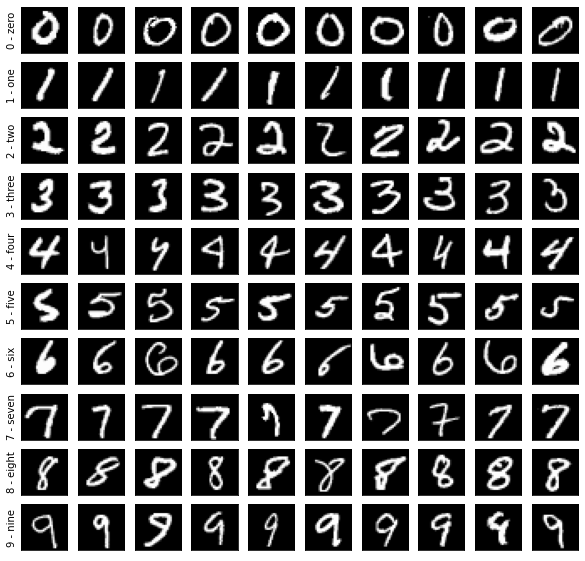

In [29]:
#@title 1. Warmup [5%]
# Change dataset to 'cifar10' for part (b)
import matplotlib.pyplot as plt 
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

labels_map = trainset.classes
figure = plt.figure(figsize=(10, 10))
cols, rows = 10, np.size(labels_map)

j = 0
while j < np.size(labels_map):
  i = 1
  while i < 11:
      sample_idx = torch.randint(len(trainset), size=(1,)).item()
      img, label = trainset[sample_idx]
      if label != j:
        continue 
      figure.add_subplot(rows, cols, i+j*10)
      if i == 1:
        plt.ylabel(labels_map[label])
      plt.yticks([])
      plt.xticks([])
      #plt.axis("off")
      if dataset == 'mnist':
        plt.imshow(img[0].squeeze(), cmap="gray")
      else:
        imshow(img)
      i += 1
  j += 1
plt.show()

In [30]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [31]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [32]:
#@title 2. Training a Single Layer Network on MNIST [10%]
# (a) Training for 20 epochs
for epoch in range(1,epochs+1):
  train(epoch)
  test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299035
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.654701
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.620077
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.325143
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.314757
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.499132
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.454105
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.457164
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.623399
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.341398

Test set: Average loss: 0.3299, Accuracy: 9084/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.428682
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.599912
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.583245
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.344379
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.396283
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.220537
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.244373
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.303021
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.241964
T

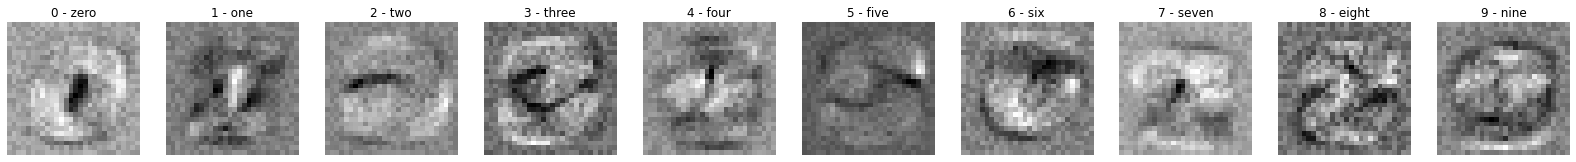

In [33]:
# (b) The network weights as images
figure = plt.figure(figsize=(28, 28))
cols, rows = np.size(labels_map), 1

for i in network.parameters():
  j = 1
  for img in i:
    figure.add_subplot(rows, cols, j)
    plt.title(labels_map[j-1])
    plt.axis("off")
    j += 1
    plt.imshow(img.detach().reshape(28,28).squeeze(), cmap="gray")
  break

In [34]:
# (c) 50 training examples 
import torch.utils.data as data_utils
indices = torch.arange(50)
train50 = data_utils.Subset(trainset, indices)
train_loader50 = torch.utils.data.DataLoader(train50, batch_size=batch_size, shuffle=True, num_workers=0)

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

def train_50(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader50):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {}\tLoss: {:.6f}'.format(
                epoch, loss.item()))
          
    return loss.item()
t_loss = 0.5
epoch = 1
while t_loss > 0.1:
  t_loss = train_50(epoch)
  epoch += 1

Train Epoch: 1	Loss: 2.564263
Train Epoch: 2	Loss: 2.324145
Train Epoch: 3	Loss: 2.124669
Train Epoch: 4	Loss: 1.955296
Train Epoch: 5	Loss: 1.807396
Train Epoch: 6	Loss: 1.675683
Train Epoch: 7	Loss: 1.557267
Train Epoch: 8	Loss: 1.450415
Train Epoch: 9	Loss: 1.353883
Train Epoch: 10	Loss: 1.266638
Train Epoch: 11	Loss: 1.187742
Train Epoch: 12	Loss: 1.116322
Train Epoch: 13	Loss: 1.051567
Train Epoch: 14	Loss: 0.992729
Train Epoch: 15	Loss: 0.939136
Train Epoch: 16	Loss: 0.890190
Train Epoch: 17	Loss: 0.845361
Train Epoch: 18	Loss: 0.804189
Train Epoch: 19	Loss: 0.766271
Train Epoch: 20	Loss: 0.731256
Train Epoch: 21	Loss: 0.698840
Train Epoch: 22	Loss: 0.668757
Train Epoch: 23	Loss: 0.640776
Train Epoch: 24	Loss: 0.614693
Train Epoch: 25	Loss: 0.590332
Train Epoch: 26	Loss: 0.567536
Train Epoch: 27	Loss: 0.546166
Train Epoch: 28	Loss: 0.526099
Train Epoch: 29	Loss: 0.507228
Train Epoch: 30	Loss: 0.489455
Train Epoch: 31	Loss: 0.472692
Train Epoch: 32	Loss: 0.456863
Train Epoch: 33	L

The model is calibrating its parameters with each epoch. I guess it is overfit now due to the lack of data. 

In [35]:
#@title 3. Training a Multi-Layer Network on MNIST [10%]
# (a) Adding a hidden layer of 1000 points
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.hidden = nn.Linear(num_inputs, 1000)
        self.linear = nn.Linear(1000, num_outputs)
        self.tanh = nn.Tanh()

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        input = self.hidden(input)
        input = self.tanh(input)
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [36]:
# Training for 10 epochs
for epoch in range(1,11):
  train(epoch)
  test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.380932
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.811865
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.508482
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.410369
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.440676
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.262707
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.275620
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.279622
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.480144
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.304970

Test set: Average loss: 0.3202, Accuracy: 9114/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.384470
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.254907
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.232287
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.427489
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.348072
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.227255
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.198878
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.439631
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.356484
T

In [37]:
# (b) For learning rate = 10
network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=10)

In [38]:
for epoch in range(1,11):
  train(epoch)
  test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.327445
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1619.522583
Train Epoch: 1 [12800/60000 (21%)]	Loss: 772.710205
Train Epoch: 1 [19200/60000 (32%)]	Loss: 851.864136
Train Epoch: 1 [25600/60000 (43%)]	Loss: 216.944382
Train Epoch: 1 [32000/60000 (53%)]	Loss: 510.972656
Train Epoch: 1 [38400/60000 (64%)]	Loss: 509.031433
Train Epoch: 1 [44800/60000 (75%)]	Loss: 118.001572
Train Epoch: 1 [51200/60000 (85%)]	Loss: 549.062683
Train Epoch: 1 [57600/60000 (96%)]	Loss: 102.066734

Test set: Average loss: 526.5664, Accuracy: 5251/10000 (53%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 441.231445
Train Epoch: 2 [6400/60000 (11%)]	Loss: 246.360992
Train Epoch: 2 [12800/60000 (21%)]	Loss: 417.121826
Train Epoch: 2 [19200/60000 (32%)]	Loss: 234.077072
Train Epoch: 2 [25600/60000 (43%)]	Loss: 268.916382
Train Epoch: 2 [32000/60000 (53%)]	Loss: 254.894623
Train Epoch: 2 [38400/60000 (64%)]	Loss: 704.705261
Train Epoch: 2 [44800/60000 (75%)]	Loss: 323.864349
Train Epoch: 2

As it can be seen, the average loss is not converging. The accuracy has unpedictable behaviour. All of these is because the learning rate is too large and the model is converging to the other extremas of the function. 

In [39]:
#@title 4. Training a Convolutional Network on CIFAR [25%]
# (a) Create a convolutional network with the following architecture
dataset = 'cifar10'

# Data Loading
# This cell might take some time when you run it for the first time, 
# because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


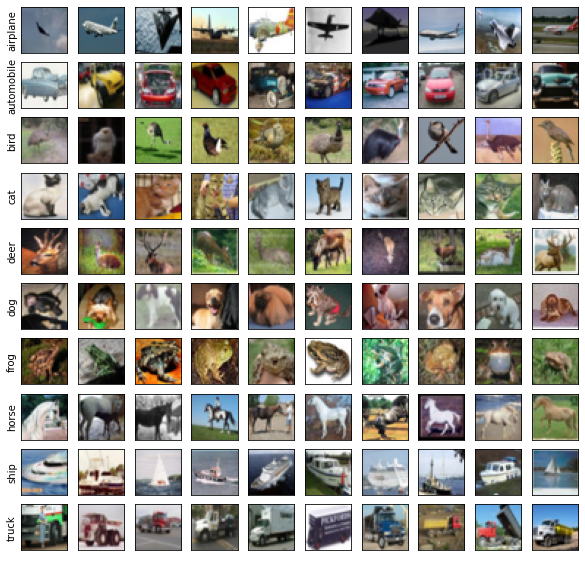

In [40]:
# Warmup for cifar10
labels_map = trainset.classes
figure = plt.figure(figsize=(10, 10))
cols, rows = 10, np.size(labels_map)

j = 0
while j < np.size(labels_map):
  i = 1
  while i < 11:
      sample_idx = torch.randint(len(trainset), size=(1,)).item()
      img, label = trainset[sample_idx]
      if label != j:
        continue 
      figure.add_subplot(rows, cols, i+j*10)
      if i == 1:
        plt.ylabel(labels_map[label])
      plt.yticks([])
      plt.xticks([])
      #plt.axis("off")
      if dataset == 'mnist':
        plt.imshow(img[0].squeeze(), cmap="gray")
      else:
        imshow(img)
      i += 1
  j += 1
plt.show()

In [45]:
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()      
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.conv2 = nn.Conv2d(16, 128, 5)
        self.fc1 = nn.Linear(128 * 5 * 5, 64)  # 5*5 from image dimension
        self.fc2 = nn.Linear(64, 10)

    def forward(self, input):
        #input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        input = F.max_pool2d(F.tanh(self.conv1(input)), (2, 2), stride = 2)
        input = F.max_pool2d(F.tanh(self.conv2(input)), (2, 2), stride = 2)
        input = torch.flatten(input, 1) # flatten all dimensions except the batch dimension
        input = F.tanh(self.fc1(input))
        output = self.fc2(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [46]:
for epoch in range(1,epochs+1):
  train(epoch)
  test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.314831
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.182225
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.068703
Train Epoch: 1 [19200/50000 (38%)]	Loss: 2.002838
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.864828
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.963565
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.768328
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.828024

Test set: Average loss: 1.7840, Accuracy: 3748/10000 (37%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.850081
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.781554
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.693656
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.862808
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.741344
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.573136
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.599973
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.730297

Test set: Average loss: 1.5838, Accuracy: 4420/10000 (44%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.699739
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.461

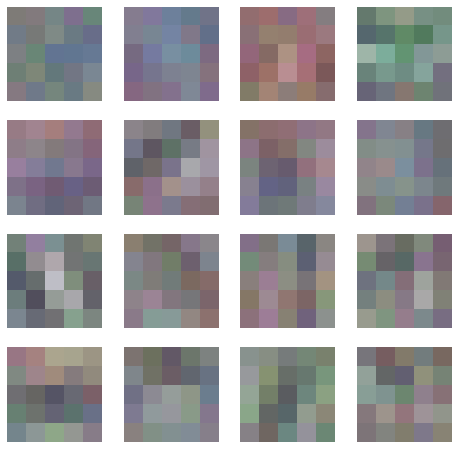

In [47]:
# (b)
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4

for i in network.conv1.parameters():
  j = 1
  for img in i:
    figure.add_subplot(rows, cols, j)
    plt.axis("off")
    j += 1
    imshow(img.detach())
  break

  (c) Breakdown of the parameters
  - Input layer:

  Has 0 parameters since it just reads the image
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity:
  
  (width of the filter $\times$ height of the filter $\times$ number of input feature maps + bias)$\times$number of output feature maps=(5$\times$5$\times$3+1)*16 = 91
  - 2 by 2 max pooling (non-overlapping):

  Has 0 parameters since it just reducec the image
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity:

  (5$\times$5$\times$16+1)$\times$128=528
  - 2 by 2 max pooling (non-overlapping):

  0 
  - Flatten to vector:

  Has 0 parameters since it just flattens the tensor 
  - Linear layer with 64 hidden units + Tanh nonlinearity:

  (number of inputs + bias)*number of outputs = (5$\times$5$\times$128+1)$\times$64=3264
  - Linear layer to 10 output units:

  (64+1)$\times$10=650

  Total: 4533
